In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Applying the Median Filter onto an image with salt and pepper noise.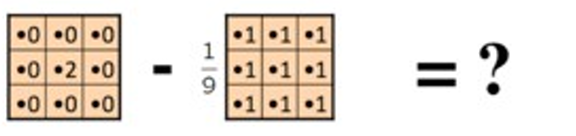

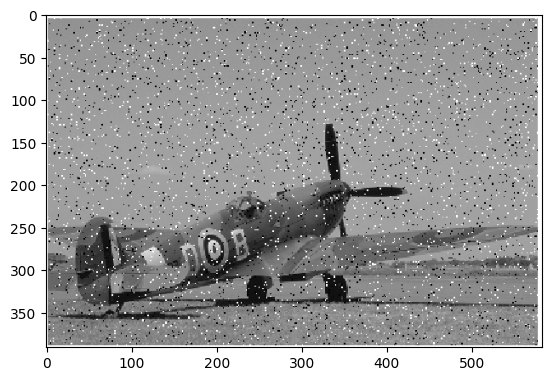

In [3]:
# import the image and convert it to grayscale
noisy_img1 = cv2.imread('saltandpepper.png', 0)
plt.imshow(noisy_img1, cmap = 'gray')

# We see that the image has salt and pepper noise.

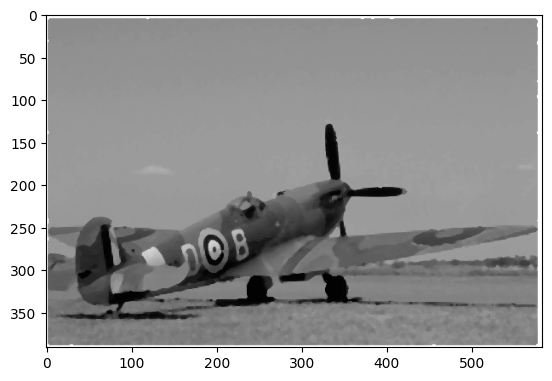

In [9]:
# Apply the Median Filter onto the image.
# This is a Non-Linear Filter, that can remove salt and pepper noise very effectively.
# 5 is the kernel size. Changing the number controls how blurry the image will get.
# The number has to be an odd number, so that the median Filter can have a "median".
filtered_img1 = cv2.medianBlur(noisy_img1, 5)
plt.imshow(filtered_img1, cmap = 'gray')

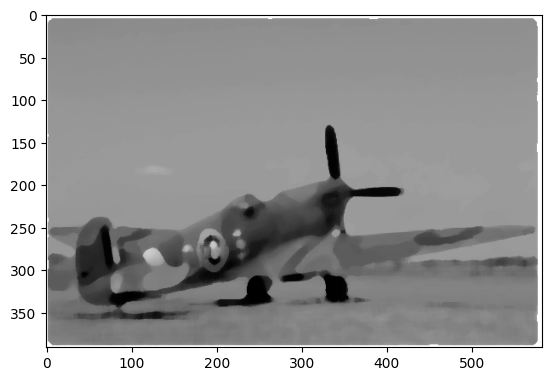

In [7]:
filtered_img1 = cv2.medianBlur(noisy_img1, 11)
plt.imshow(filtered_img1, cmap = 'gray')

# Applying the same Median Filter onto a different image.

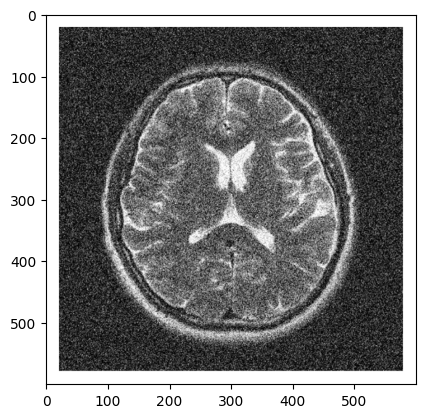

In [16]:
# Read the noise image as a grayscale image
noisy_img_2 = cv2.imread('mri.jpg', 0)
plt.imshow(noisy_img_2, cmap='gray')

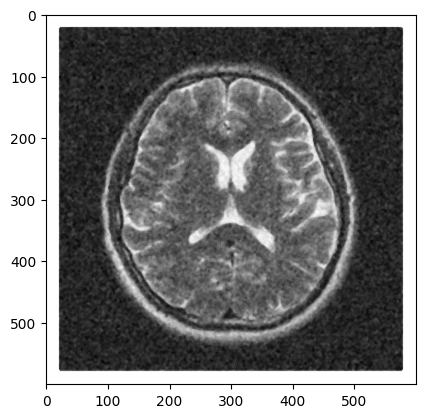

In [17]:
filtered_img_2 = cv2.medianBlur(noisy_img_2, 5)
plt.imshow(filtered_img_2, cmap = 'gray')

# We see that the median filter is not very effective here.

# We will try the Average Filter

In [18]:
# Define the kernel size (neighborhood size for computing the average)
kernel_size = 11

# Create the mean filter kernel
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
print(kernel)

# This is the kernal below.

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

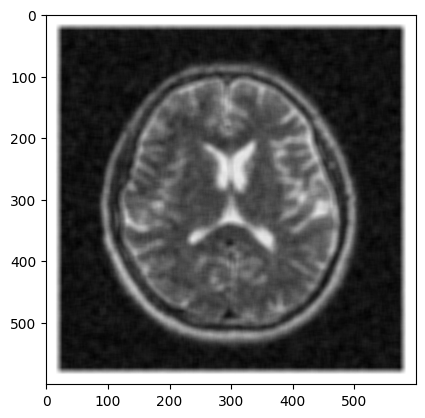

In [19]:
# Apply the filter using cv2.filter2D()
filtered_image_2 = cv2.filter2D(noisy_img_2, -1, kernel)
plt.imshow(filtered_image_2, cmap = 'gray')

# It's very blurry so we can try to make the kernel smaller

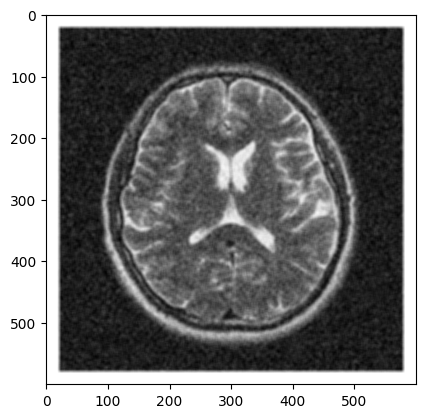

In [22]:
kernel_size = 6


kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)


filtered_image_2 = cv2.filter2D(noisy_img_2, -1, kernel)
plt.imshow(filtered_image_2, cmap = 'gray')

# It's a bit better.

# Sharpening and Image

 A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it
from the original image to obtain the "details" of the image, and adds the "details" to the
original image.

So we add the details of the original image AGAIN onto the original image.
That way the original image's details have been doubled, and hence are more detailed.

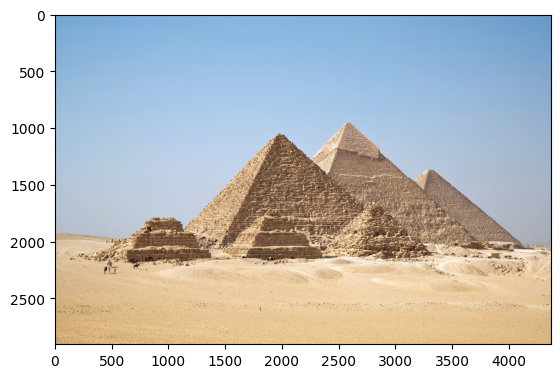

In [25]:
# Read the image
img_3 = cv2.imread('All_Gizah_Pyramids.jpg')

# Convert the image from BGR to RGB
img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_3, cmap = 'gray')

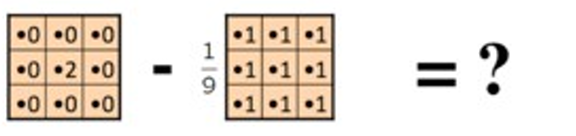

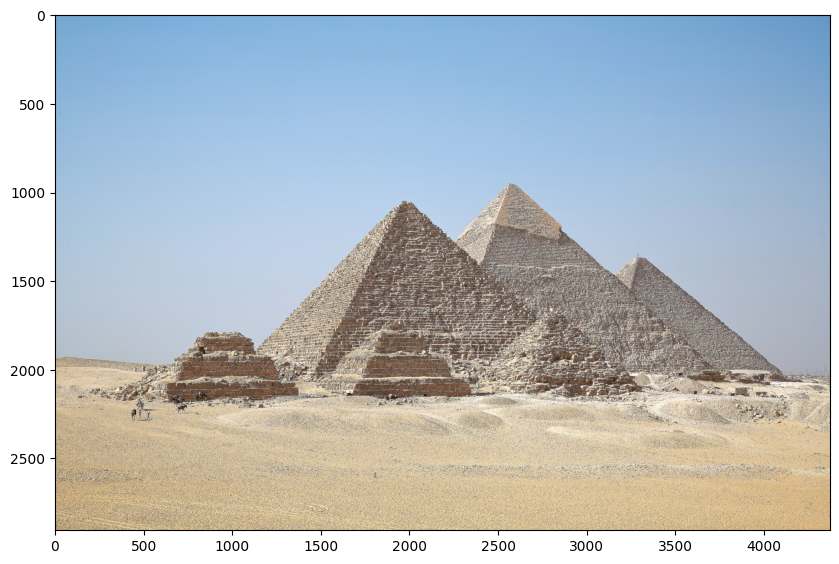

In [28]:
# Define the sharpening kernel manually.
# Using np.array.
# This kernel is the resultant matrix from the image above.
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])


# Use the filter2D function to apply the filter onto img_3.
sharpened_img = cv2.filter2D(img_3, -1, sharpening_kernel)


# Make the figure a bit bigger.
plt.figure(figsize = (10, 10))


# Display the sharpened image
plt.imshow(sharpened_img)

# We see that the image is infact more detailed.

# Edge Detection

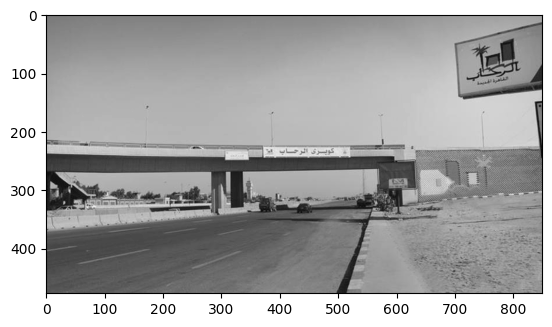

In [30]:
# Read the image as a grayscale image.
img_4 = cv2.imread('streetsigns.jpg', 0)
plt.imshow(img_4, cmap='gray')

Define the Sobel Kernels that will detect the edges.

In [33]:
# Sobel Kernels:


# This kernel detects the vertical edges.
sobel_x_kernel = np.array([[-1,  0,  1],
                           [-2,  0,  2],
                           [-1,  0,  1]])


# This kernel detects the horizontal edges.
sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

In [34]:
# Convolve the image with the Sobel kernels:.
# Detect the edges in img_4 using both kernels seperately.

# Using the vertical edge detection kernel.
img_sobel_x = cv2.filter2D(img_4, -1, sobel_x_kernel)

# Using the horizontal edge detection kernel.
img_sobel_y = cv2.filter2D(img_4, -1, sobel_y_kernel)

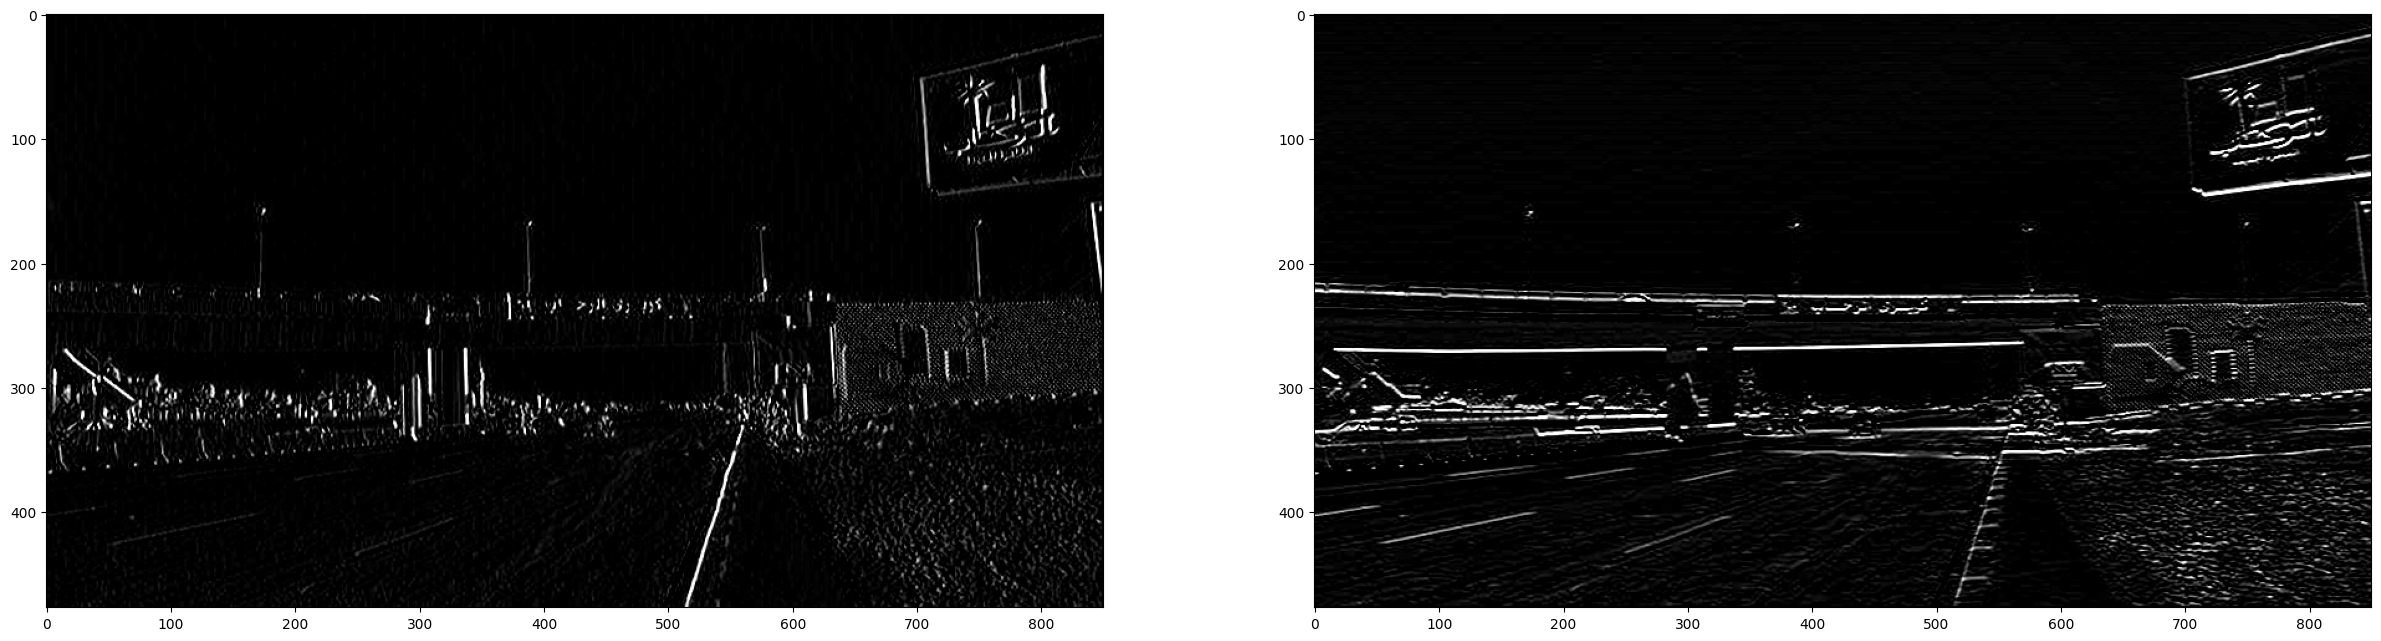

In [38]:
# Plot both images:.

fix, axs = plt.subplots(1, 2, figsize = (30, 10))
axs[0].imshow(img_sobel_x, cmap='gray')
axs[1].imshow(img_sobel_y, cmap='gray')

plt.show()

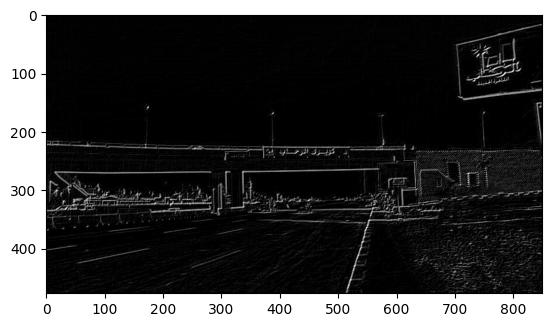

In [42]:
# Combine the results to get the final Sobel image with both edges detected in one image.
img_sobel = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)
plt.imshow(img_sobel, cmap='gray')